#### EP4130: Data Science Analysis

#### Assignment: 8

#### Ranveer Sahu (ES21BTECH11025)

*****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroML.correlation import bootstrap_two_point_angular

*****

**Question 1**

Calculate the angular two-point correlation function of galaxies (including errors obtained by 10 bootstrap resamples) using subset of data from the Blanco Cosmology Survey with r-band magnitude between 17 and 20, and using 16 logarithmic-spaced angular bins from 1/60◦ to 1◦ . Use a linear scale for Y-axis. Galaxies in Blanco Cosmology Survey have spread model> 0.002. This data can be downloaded from http://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt (30 points)(Hint : Look at the astroML source code for Figure 6.17)

In [2]:
#Data read
file_data = pd.read_csv("q1.csv" , sep = ' ')
file_data

,#RA,DEC,r-mag,spread_model,spread_model_err
0,76.709724,-56.091484,22.2622,0.113884,0.002812
1,77.430664,-56.090149,23.8355,0.186889,0.003559
2,76.937309,-56.092442,17.7021,0.000614,0.000120
3,77.344833,-56.089947,23.7293,0.117396,0.000751
4,77.416412,-56.089119,23.4456,0.192760,0.004764
...,...,...,...,...,...
49995,77.138313,-53.850994,16.4224,0.000928,0.004025
49996,76.861160,-53.846672,22.1385,0.076647,0.018807
49997,76.892189,-53.855347,20.5829,0.013071,-0.001716
49998,77.500732,-53.853760,20.7490,0.017413,-0.000761


In [3]:
#Filter applied
condition1 = file_data['spread_model']>0.002
condition2 = (file_data['r-mag'] > 17) & (file_data['r-mag'] < 20)

blanco = file_data[condition1 & condition2]
blanco

,#RA,DEC,r-mag,spread_model,spread_model_err
16,77.039696,-56.084904,19.9448,0.008856,0.000064
38,77.119270,-56.108150,19.6127,0.006623,-0.000183
43,76.676086,-56.106075,18.8138,0.002451,0.000430
151,77.118393,-56.084389,19.7339,0.009028,0.020733
153,76.823029,-56.082844,19.8468,1.937630,0.019814
...,...,...,...,...,...
49924,77.387482,-53.855377,19.8971,0.010697,-0.000017
49935,76.962509,-53.848270,19.8635,0.003855,-0.001900
49962,77.199036,-53.847679,19.6593,4.073760,0.017146
49969,77.251816,-53.856327,18.7764,0.435740,0.023601


In [4]:
#Define angular bin
bins = 10 ** np.linspace(np.log10(1.0/60) , np.log10(1) , 16)
results = [bins]

In [5]:
#compute correlation function
results += bootstrap_two_point_angular(blanco["#RA"] , blanco["DEC"] , bins = bins \
, method = "landy-szalay" , Nbootstraps = 10)

In [6]:
#Extract bin centers, correlation function, correlation functions error, and bootstrap results
bins , corr ,  corr_err , bootstrap = results
bin_centers = (bins[:-1] + bins[1:]) / 2

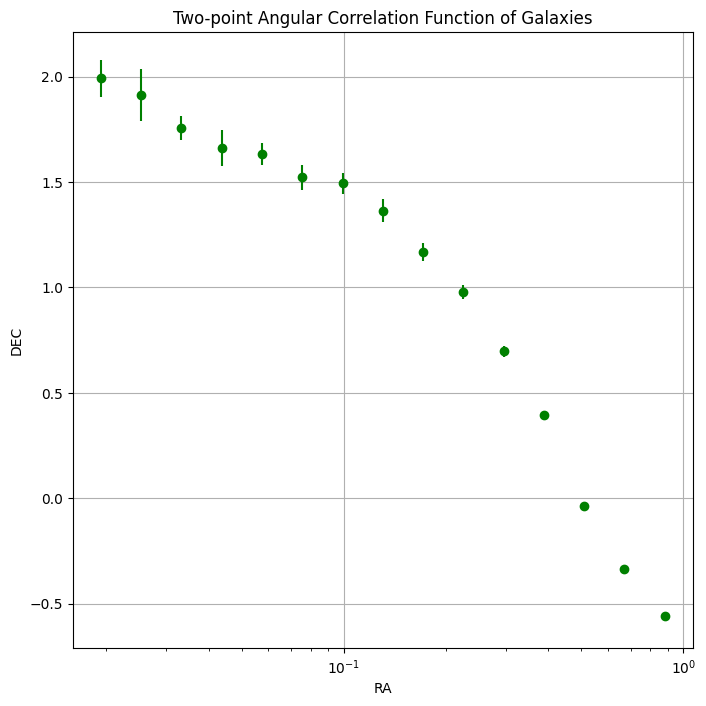

In [7]:
#ploting 
plt.figure(figsize = (8,8))
plt.xscale('log')
plt.yscale('linear')
plt.grid(True)
plt.errorbar(bin_centers , corr , yerr = corr_err , fmt = 'o' , color = 'g')
plt.title("Two-point Angular Correlation Function of Galaxies")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.show()

*****